In [7]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=3a1c3b5c25a7aca09e81e2254ded0db1f605d329a5654fc1555612f2df27ddf0
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [8]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Dokter", "Mancing", "L" ), ("Budi", 23, "Buruh", "Game", "L" ), ("Citra", 29, "Guru", "Membaca", "P"), ("Dina", 45, "Kasir", "Bernyanyi", "P")]
columns = ["Nama", "Usia", "Profesi", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+-------+---------+------+
| Nama|Usia|Profesi|     Hobi|Gender|
+-----+----+-------+---------+------+
|  Ali|  34| Dokter|  Mancing|     L|
| Budi|  23|  Buruh|     Game|     L|
|Citra|  29|   Guru|  Membaca|     P|
| Dina|  45|  Kasir|Bernyanyi|     P|
+-----+----+-------+---------+------+



In [ ]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Dokter", "Mancing", "L" ), ("Budi", 23, "Buruh", "Game", "L" ), ("Citra", 29, "Guru", "Membaca", "P"), ("Dina", 45, "Kasir", "Bernyanyi", "P")]
columns = ["Nama", "Usia", "Profesi", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] < 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Gender", ascending=False)
df_sorted.show()

+-----+----+-------+---------+------+
| Nama|Usia|Profesi|     Hobi|Gender|
+-----+----+-------+---------+------+
|  Ali|  34| Dokter|  Mancing|     L|
| Budi|  23|  Buruh|     Game|     L|
|Citra|  29|   Guru|  Membaca|     P|
| Dina|  45|  Kasir|Bernyanyi|     P|
+-----+----+-------+---------+------+

+-----+----+-------+-------+------+
| Nama|Usia|Profesi|   Hobi|Gender|
+-----+----+-------+-------+------+
| Budi|  23|  Buruh|   Game|     L|
|Citra|  29|   Guru|Membaca|     P|
+-----+----+-------+-------+------+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+-------+---------+------+
| Nama|Usia|Profesi|     Hobi|Gender|
+-----+----+-------+---------+------+
|Citra|  29|   Guru|  Membaca|     P|
| Dina|  45|  Kasir|Bernyanyi|     P|
|  Ali|  34| Dokter|  Mancing|     L|
| Budi|  23|  Buruh|     Game|     L|
+-----+----+-------+---------+------+



In [9]:
pip install pandas

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina", "Joko"], "Usia": [34, 23, 29, 45, 36], "Gender" :["L", "L", "P", "P", "L"]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas

,Nama,Usia,Gender
0,Ali,34,L
1,Budi,23,L
2,Citra,29,P
3,Dina,45,P
4,Joko,36,L


from matplotlib import pyplot as plt
df_pandas['Usia'].plot(kind='hist', bins=20, title='Usia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_pandas.groupby('Nama').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_pandas.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_pandas['Usia'].plot(kind='line', figsize=(8, 4), title='Usia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df_pandas.groupby('Nama')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Nama')
_ = plt.ylabel('Gender')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_pandas['Nama'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_pandas, x='Usia', y='Nama', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_pandas['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_pandas, x='Usia', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


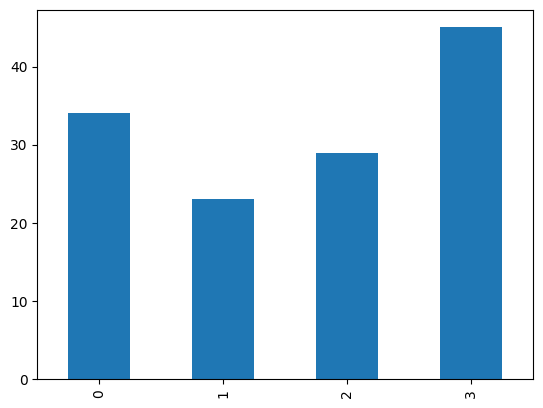

In [ ]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [25]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Dokter", "Mancing", "L" ), ("Budi", 23, "Buruh", "Game", "L" ), ("Citra", 29, "Guru", "Membaca", "P"), ("Dina", 45, "Kasir", "Bernyanyi", "P")]
columns = ["Nama", "Usia", "Profesi", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Menghitung rata-rata usia menggunakan Pandas
rata_rata_usia = df_pandas_from_spark['Usia'].describe()

# Menampilkan hasil
print("Rata-rata usia :", rata_rata_usia)
# Menampilkan DataFrame hasil konversi
display(df_pandas_from_spark)

+-----+----+-------+---------+------+
| Nama|Usia|Profesi|     Hobi|Gender|
+-----+----+-------+---------+------+
|  Ali|  34| Dokter|  Mancing|     L|
| Budi|  23|  Buruh|     Game|     L|
|Citra|  29|   Guru|  Membaca|     P|
| Dina|  45|  Kasir|Bernyanyi|     P|
+-----+----+-------+---------+------+

Rata-rata usia : count     4.000000
mean     32.750000
std       9.322911
min      23.000000
25%      27.500000
50%      31.500000
75%      36.750000
max      45.000000
Name: Usia, dtype: float64


,Nama,Usia,Profesi,Hobi,Gender
0,Ali,34,Dokter,Mancing,L
1,Budi,23,Buruh,Game,L
2,Citra,29,Guru,Membaca,P
3,Dina,45,Kasir,Bernyanyi,P


In [17]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina", "Joko"], "Usia": [34, 23, 29, 45, 36], "Gender" :["L", "L", "P", "P", "L"]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
df_pandas
# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_spark_from_pandas.show()


+-----+----+------+
| Nama|Usia|Gender|
+-----+----+------+
|  Ali|  34|     L|
| Budi|  23|     L|
|Citra|  29|     P|
| Dina|  45|     P|
| Joko|  36|     L|
+-----+----+------+

